In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR

import warnings
warnings.filterwarnings("ignore")

## Ex. 4.9

In [2]:
def DR(X_train, y_train, X_test, y_test):
    fit1 = LDA().fit(X_train, y_train)
    fit2 = QDA().fit(X_train, y_train)
    fit3 = LR(random_state=0).fit(X_train, y_train)
    result1 = fit1.score(X_train, y_train), fit1.score(X_test, y_test)
    result2 = fit2.score(X_train, y_train), fit2.score(X_test, y_test)
    result3 = fit3.score(X_train, y_train), fit3.score(X_test, y_test)
    
    Rates1 = np.zeros((10, 2))
    Rates2 = np.zeros((10, 2))
    Rates3 = np.zeros((10, 2))
    for i in range(10):
        fit0 = LDA(n_components=i+1).fit(X_train, y_train)
        X_train_t = fit0.transform(X_train)
        X_test_t = fit0.transform(X_test)

        fit1 = LDA().fit(X_train_t, y_train)
        fit2 = QDA().fit(X_train_t, y_train)
        fit3 = LR(random_state=0).fit(X_train_t, y_train)
        Rates1[i] = fit1.score(X_train_t, y_train), fit1.score(X_test_t, y_test)
        Rates2[i] = fit2.score(X_train_t, y_train), fit2.score(X_test_t, y_test)
        Rates3[i] = fit3.score(X_train_t, y_train), fit3.score(X_test_t, y_test)

    plt.plot(np.arange(10) + 1, 1 - Rates1[:, 0], c='g', label='train (LDA)')
    plt.plot(np.arange(10) + 1, 1 - Rates1[:, 1], c='g', label='test (LDA)')
    plt.plot(np.arange(10) + 1, 1 - Rates2[:, 0], c='r', label='train (QDA)')
    plt.plot(np.arange(10) + 1, 1 - Rates2[:, 1], c='r', label='test (QDA)')
    plt.plot(np.arange(10) + 1, 1 - Rates3[:, 0], c='y', label='train (LR)')
    plt.plot(np.arange(10) + 1, 1 - Rates3[:, 1], c='y', label='test (LR)')
    plt.legend()
    plt.show()

    index = np.argsort(-Rates1[:, 1])[0]
    print('LDA:', index + 1, Rates1[index], Rates1[-1], result1)
    index = np.argsort(-Rates2[:, 1])[0]
    print('QDA', index + 1, Rates2[index], Rates2[-1], result2)
    index = np.argsort(-Rates3[:, 1])[0]
    print('LR:', index + 1, Rates3[index], Rates3[-1], result3)

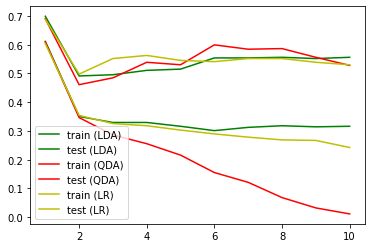

LDA: 2 [0.64962121 0.50865801] [0.68371212 0.44372294] (0.6837121212121212, 0.44372294372294374)
QDA 2 [0.65340909 0.53896104] [0.98863636 0.47186147] (0.9886363636363636, 0.47186147186147187)
LR: 2 [0.64583333 0.5021645 ] [0.75757576 0.46969697] (0.7253787878787878, 0.461038961038961)


In [3]:
X_train = pd.read_csv('./data/vowel.train', index_col=0)
X_test = pd.read_csv('./data/vowel.test', index_col=0)
y_train = X_train.pop('y') - 1
y_test = X_test.pop('y') - 1
columns = X_train.columns

DR(X_train, y_train, X_test, y_test)

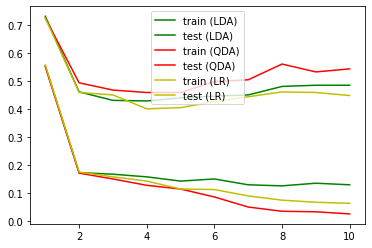

LDA: 4 [0.84280303 0.57142857] [0.87121212 0.51515152] (0.8712121212121212, 0.5151515151515151)
QDA 4 [0.87310606 0.54112554] [0.97537879 0.45670996] (1.0, 0.44155844155844154)
LR: 4 [0.85795455 0.5995671 ] [0.9375     0.55194805] (0.884469696969697, 0.487012987012987)


In [4]:
for col in columns:
    X_train['{}^2'.format(col)] = X_train[col] ** 2
    X_test['{}^2'.format(col)] = X_test[col] ** 2

DR(X_train, y_train, X_test, y_test) # best DR-based from LR

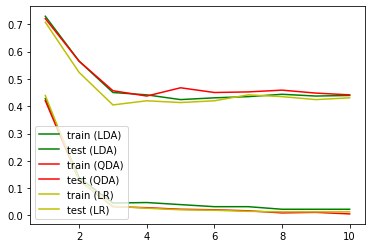

LDA: 5 [0.96022727 0.57575758] [0.97727273 0.56060606] (0.9772727272727273, 0.5606060606060606)
QDA 4 [0.97159091 0.56277056] [0.99431818 0.55844156] (1.0, 0.20346320346320346)
LR: 3 [0.96590909 0.5952381 ] [0.98674242 0.56926407] (0.9886363636363636, 0.5194805194805194)


In [5]:
for i in range(len(columns)-1):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        X_train['{}*{}'.format(col1, col2)] = X_train[col1] * X_train[col2]
        X_test['{}*{}'.format(col1, col2)] = X_test[col1] * X_test[col2]

DR(X_train, y_train, X_test, y_test)

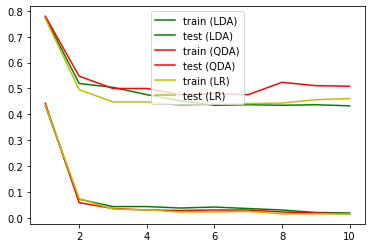

LDA: 10 [0.98106061 0.56709957] [0.98106061 0.56709957] (0.9810606060606061, 0.5670995670995671)
QDA 5 [0.97159091 0.52380952] [0.98484848 0.49134199] (1.0, 0.2878787878787879)
LR: 5 [0.97727273 0.56493506] [0.98484848 0.53896104] (0.9526515151515151, 0.5)


In [6]:
for col in columns:
    X_train['{}^3'.format(col)] = X_train[col] ** 3
    X_test['{}^3'.format(col)] = X_test[col] ** 3

DR(X_train, y_train, X_test, y_test) # best from LDA